<h1>Lung Cancer Predection ML</h1>

In [1]:
import pandas as pd,matplotlib.pyplot as plt,seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('lung_cancer_mortality_data_large_v2.csv')

In [3]:
df.head()    

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


In [4]:
df.shape

(3250000, 18)

In [5]:
df.isnull().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# int_df = df.select_dtypes(include=['int'])
# float_df = df.select_dtypes(include=['float'])
# num = pd.concat([int_df, float_df], axis=1)
af=df.drop(columns={'id','country','diagnosis_date','beginning_of_treatment_date','end_treatment_date'})

In [8]:
label=LabelEncoder()
for i in af.columns:
    if af[i].dtype == 'object':
        af[i]=label.fit_transform(af[i])

Text(0.5, 1.0, 'Scatter Plot of Target')

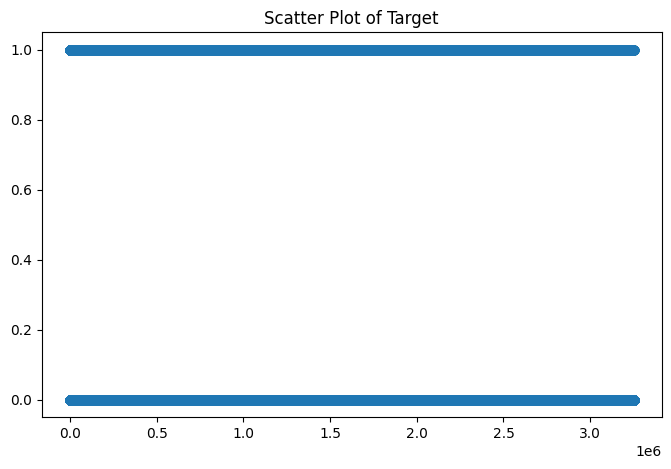

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df['survived'], alpha=0.6)
plt.title('Scatter Plot of Target')

In [10]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'beginning_of_treatment_date', 'family_history', 'smoking_status',
       'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
       'other_cancer', 'treatment_type', 'end_treatment_date', 'survived'],
      dtype='object')

In [11]:
df['survived'].value_counts()

survived
0    2536298
1     713702
Name: count, dtype: int64

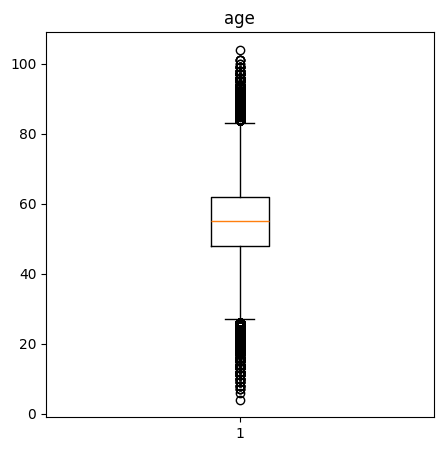

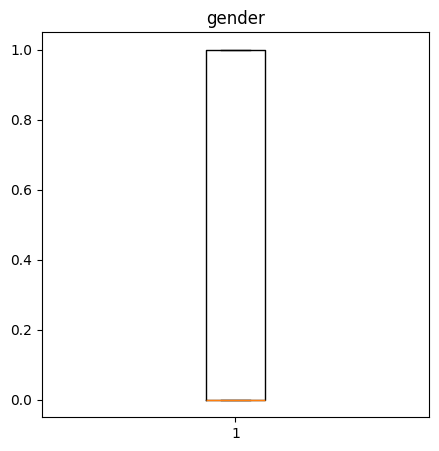

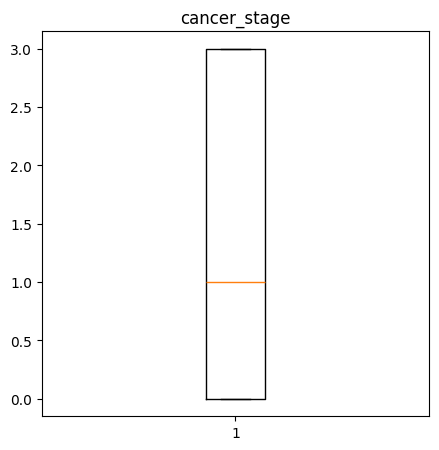

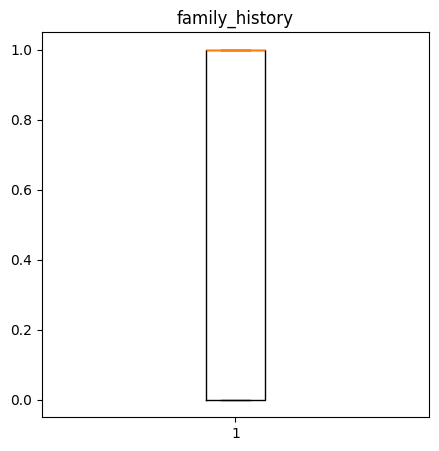

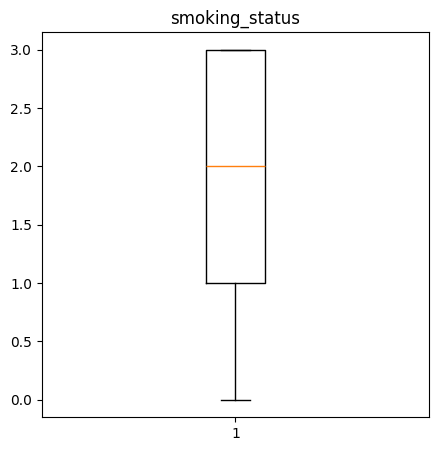

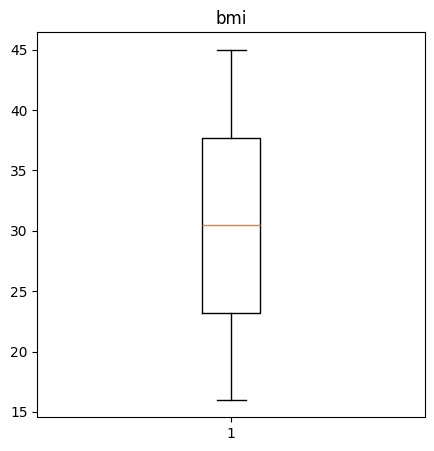

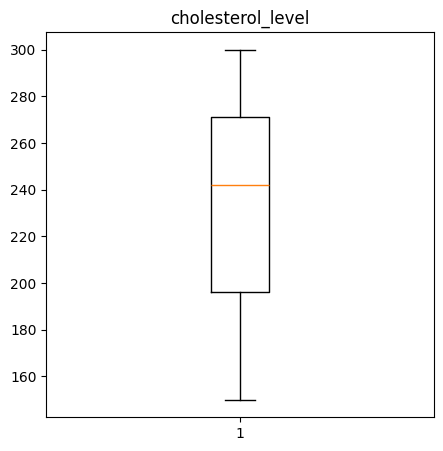

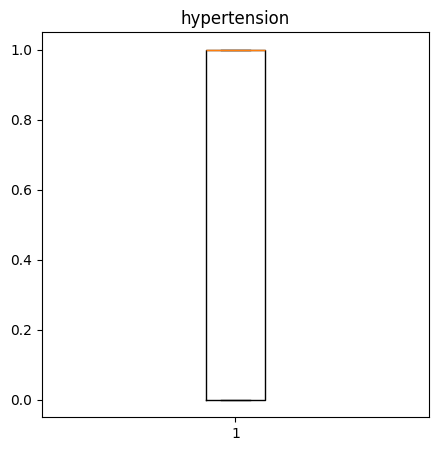

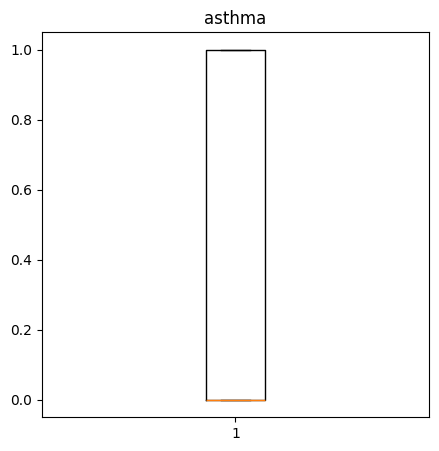

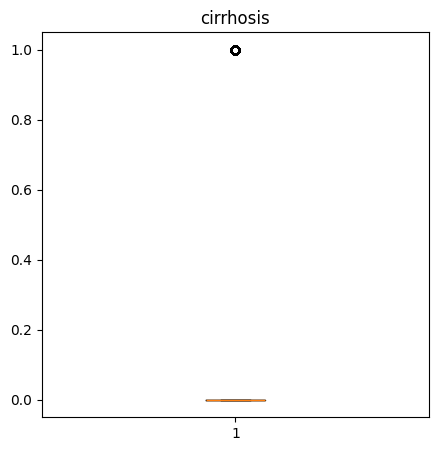

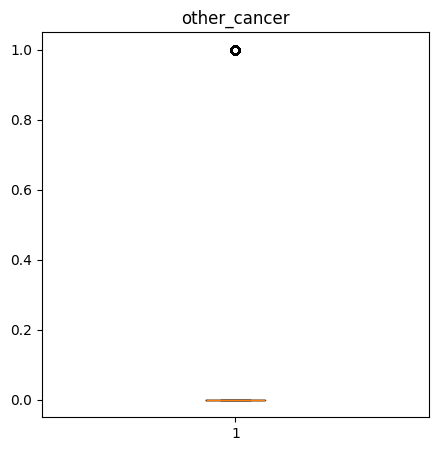

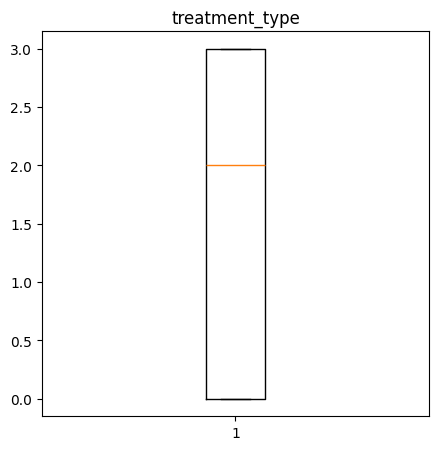

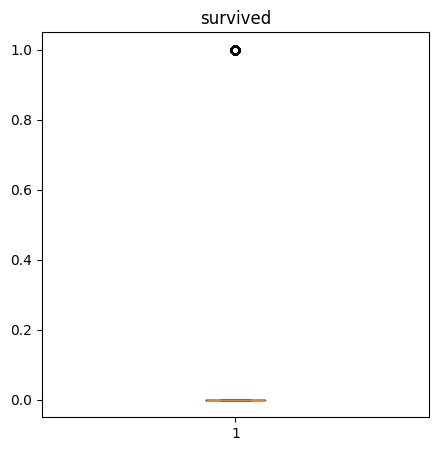

In [12]:
for i in af.columns:
    plt.figure(figsize=(5,5))
    plt.title(i)
    plt.boxplot(af[i])

In [12]:
# q1=af.quantile(0.25)
# q3=af.quantile(0.75)
# iqr=q3-q1
# trim=af[~((af>(q3+(1.5*iqr))) | (af<(q3-(1.5*iqr)))).any(axis=1)]

In [13]:
min(af['age'])

4.0

In [14]:
df['survived'].value_counts()

survived
0    2536298
1     713702
Name: count, dtype: int64

In [16]:
af

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64.0,0,2,0,2,31.1,257,1,1,0,0,1,0
1,50.0,1,2,1,3,25.9,208,1,0,0,0,2,0
2,65.0,1,3,0,2,18.9,193,0,0,0,0,3,0
3,51.0,0,2,1,1,34.6,249,1,1,1,0,3,1
4,37.0,1,0,1,2,40.2,262,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,45.0,1,3,0,0,31.0,273,1,1,0,0,0,1
3249996,51.0,1,3,1,0,41.2,279,1,1,0,0,3,0
3249997,45.0,1,2,1,0,18.2,187,1,1,0,0,1,0
3249998,45.0,1,0,0,3,40.2,271,1,0,0,0,3,0


In [17]:
x=af.iloc[:,:-1]
y=af.iloc[:,-1:]

In [18]:
x

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type
0,64.0,0,2,0,2,31.1,257,1,1,0,0,1
1,50.0,1,2,1,3,25.9,208,1,0,0,0,2
2,65.0,1,3,0,2,18.9,193,0,0,0,0,3
3,51.0,0,2,1,1,34.6,249,1,1,1,0,3
4,37.0,1,0,1,2,40.2,262,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,45.0,1,3,0,0,31.0,273,1,1,0,0,0
3249996,51.0,1,3,1,0,41.2,279,1,1,0,0,3
3249997,45.0,1,2,1,0,18.2,187,1,1,0,0,1
3249998,45.0,1,0,0,3,40.2,271,1,0,0,0,3


In [19]:
y

,survived
0,0
1,0
2,0
3,1
4,0
...,...
3249995,1
3249996,0
3249997,0
3249998,0


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=12)

In [21]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\gnana\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gnana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred=classifier.predict(x_test)
accuracy_score(y_pred,y_test)

0.7806538461538461

In [24]:
cm=confusion_matrix(y_pred,y_test)
print(classification_report(y_test, y_pred))

C:\Users\gnana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gnana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88    507425
           1       0.00      0.00      0.00    142575

    accuracy                           0.78    650000
   macro avg       0.39      0.50      0.44    650000
weighted avg       0.61      0.78      0.68    650000



C:\Users\gnana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(classification_report(y_test, y_pred))

C:\Users\gnana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gnana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88    507425
           1       0.00      0.00      0.00    142575

    accuracy                           0.78    650000
   macro avg       0.39      0.50      0.44    650000
weighted avg       0.61      0.78      0.68    650000



C:\Users\gnana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [27]:
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [28]:
y_pred=dt_gini.predict(x_test)
accuracy_score(y_pred,y_test)*100

78.06538461538462

In [29]:
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [30]:
y_pred=dt_entropy.predict(x_test)
accuracy_score(y_pred,y_test)*100

78.06538461538462

In [31]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

C:\Users\gnana\AppData\Local\Temp\ipykernel_1060\1388288691.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10)

In [32]:
y_pred=rf.predict(x_test)
accuracy_score(y_pred,y_test)*100

75.84553846153847

In [33]:
nbc=GaussianNB()
nbc.fit(x_train,y_train)

C:\Users\gnana\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [34]:
y_pred=nbc.predict(x_test)
accuracy_score(y_pred,y_test)*100

78.06538461538462

In [35]:
svm_sigmoid = SVC(kernel='sigmoid')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly')
svm_linear = SVC(kernel='linear')

In [31]:
# svm_sigmoid.fit(x_train,y_train)


In [36]:
#Decision Tree
dt=DecisionTreeClassifier()